# Pymaceuticals Inc.
---

### Analysis

#### Observation 1: It appears that a higher mouse weight is correlated with a larger tumor volume (Perhaps a larger tumor volume contributes to a higher weight for the mouse or a mouse with a higher weight has a higher chance of having cancer?) 
#### Observation 2: The standard errors of tumor volumes of the mice on each drug are small compared to the mean tumor volumes. Therefore, it is fair to say that the sample means of tumor volumes of the mice on each drug do not differ significantly from the population means of tumor volumes of the mice on each drug. The population in this case is all the mice in the world. 
#### Observation 3: There is slightly more data on mice on Capomulin and Ramicane.
#### Observation 4: For a randomly chosen mouse on Capomulin, tumor volume decreases over time.
#### Observation 5: The median final tumor volumes of mice on Capomulin and Ramicane seem significantly smaller than the median final tumor volumes of mice on Infubinol and Ceftamin.




 
 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice (unique mouse_ids)
len(merged_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

## Set both Mouse ID and Timepoint as index and save as a new dataframe
new_merged_df = merged_df.set_index(["Mouse ID", "Timepoint"])

## Look for entries in which there are duplicate IDs (Mouse IDs are the same and Timepoints are the same)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicates = new_merged_df.index.duplicated(keep=False)

# Indexing like this works in R, so I just gave it a try in Python/Pandas
merged_df[duplicates==True]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

## Referring to duplicate rows by index number
## https://www.w3schools.com/python/pandas/ref_df_drop.asp#:~:text=The%20drop()%20method%20removes,method%20removes%20the%20specified%20row.
no_duplicates_df = merged_df.drop(labels = [908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], axis = 'index' )

## Check that there are no more entries with the mouse with id 'g989'
no_duplicates_df.loc[no_duplicates_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
no_duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
len(no_duplicates_df["Mouse ID"].unique())

248

In [10]:
no_duplicates_df["Timepoint"].max()

45

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

## Get all the drug regimens, put them in a list, iterate through them and compile summary statistics for each
list_of_dicts = []

drug_reg = no_duplicates_df["Drug Regimen"].unique()
for drug in drug_reg:
    
    mean_tumor = np.mean(no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]) ## Mean
    median_tumor = np.median(no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]) ## Median
    var_tumor = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"].var()## Variance
    std_dev_tumor = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"].std() ## Standard deviation
    std_error = sem(no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"], ddof=1) ## Standard error
    
    ## Create a dictionary for this particular drug
    drug_stats = {}
    drug_stats["Drug Regimen"] = drug
    drug_stats["mean"] = mean_tumor
    drug_stats["median"] = median_tumor
    drug_stats["var"] = var_tumor
    drug_stats["std"] = std_dev_tumor
    drug_stats["sem"] = std_error
    
    ## Add dictionary to list of dictionaries
    list_of_dicts.append(drug_stats)

In [13]:
drug_regimen_groups = no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_groups

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
## Create a dataframe from the list of dictionaries
summary_stats_df = pd.DataFrame(list_of_dicts)

## Set Drug Regimen as index
summary_stats_df = summary_stats_df.set_index('Drug Regimen')
summary_stats_df = summary_stats_df.sort_index()
summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
## Get all the drug regimens, put them in a list, iterate through them and compile summary statistics for each
list_of_dicts = []

drug_reg = no_duplicates_df["Drug Regimen"].unique()
for drug in drug_reg:
    summary_stats = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"].describe()
    list_of_dicts.append(summary_stats)

In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

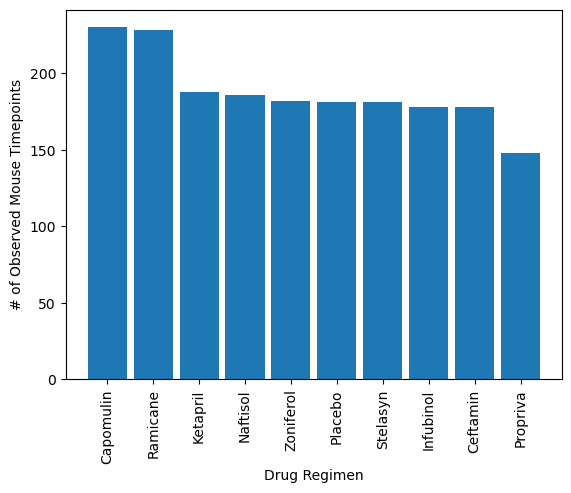

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

## Number of mouse id + timepoint units belonging to each drug regimen
timepoints_counts = no_duplicates_df["Drug Regimen"].value_counts()

## Sort the previous Series by descending counts
timepoints_counts = timepoints_counts.sort_values(ascending=False)

## Make a bar graph using Pandas
timepoints_counts.plot(kind="bar", width=0.85)

## Make an array with numbers from 0 to number of treatments (including placebo) for purposes
## of adjusting how long x-axis is compared to the bars
x_axis = np.arange(len(drug_reg)) 
## Space between leftmost bar and rightmost bar from edges
plt.xlim(-0.9, len(x_axis)-0.1)

## Label y axis
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()

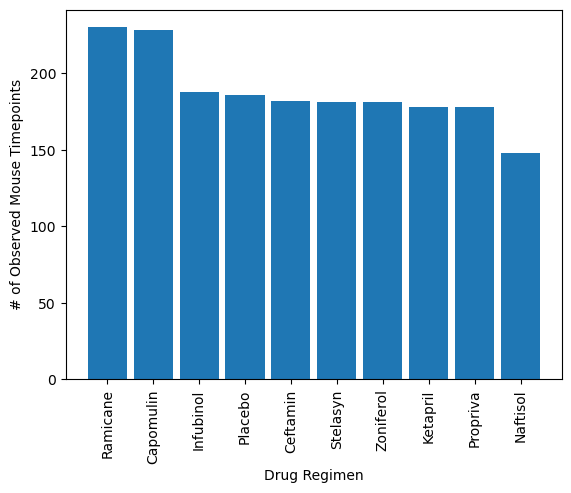

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

## Make an array with numbers from 0 to number of treatments (including placebo) for purposes
## of adjusting how long x-axis is compared to the bars and placing the x tick marks
x_axis = np.arange(len(drug_reg)) 

## Make a bar graph using pyplot
plt.bar(x_axis, timepoints_counts, width=0.85)

## Where to place x tick marks and label with drug names
plt.xticks(x_axis, no_duplicates_df["Drug Regimen"].unique(), rotation=90)

## Space between leftmost bar and rightmost bar from edges
plt.xlim(-0.9, len(x_axis)-0.1)

## Label x-axis and y-axis
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
 
plt.show()

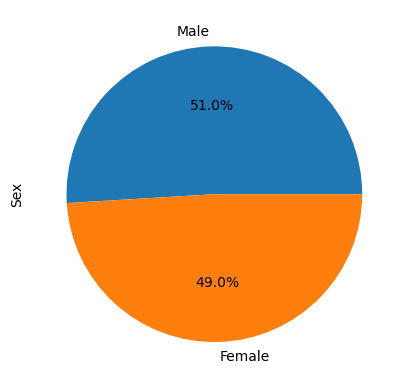

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['blue', 'orange']
mice_sex = no_duplicates_df["Sex"].value_counts()
mice_sex.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex")
plt.show()

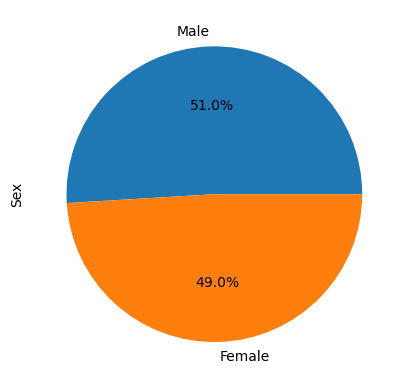

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x = mice_sex.values, labels = mice_sex.keys(), autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

## Extract part of the original dataframe that only consists of drugs that we are newly studying
#drugs_of_interest_df = no_duplicates_df.loc[(no_duplicates_df["Drug Regimen"] == "Capomulin") | (no_duplicates_df["Drug Regimen"] == "Ramicane") | (no_duplicates_df["Drug Regimen"] == "Infubinol") | (no_duplicates_df["Drug Regimen"] == "Ceftamin")] 

## From the newly created dataframe above, we only are interested in the Mouse ID and Timepoint columns to make groupby easier
timepoint_tumor_df = no_duplicates_df[["Mouse ID", "Timepoint"]]

## Last timepoint for each mouse on the drug regimens in which we are interested
last_timepoint_df = timepoint_tumor_df.groupby("Mouse ID", as_index = True).max()

## Merge the dataframe consisting of only last datapoint of each mouse on the drug regimens in which we are interested with the 
## original dataframe
last_timepoint_all_info_df = pd.merge(last_timepoint_df, no_duplicates_df, how="left", on = ["Mouse ID", "Timepoint"])


In [18]:
no_duplicates_df.loc[no_duplicates_df["Mouse ID"] == "a203"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


In [35]:
last_timepoint_all_info_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_info = (last_timepoint_all_info_df.loc[last_timepoint_all_info_df["Drug Regimen"] == treatment])["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(treatment_info)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_info.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    poss_outliers = treatment_info.loc[(treatment_info.values < lower_bound) | (treatment_info.values  > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {poss_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatments, color='red') ## Boxplot for Capomulin
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'color'

## Line and Scatter Plots

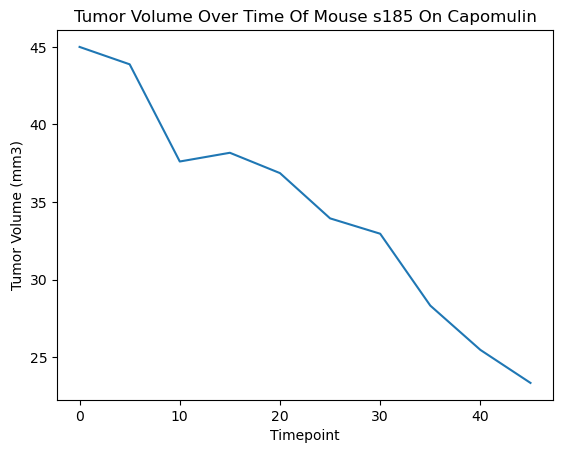

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

## Take a look at the mice that were on Capomulin and pick one (I pick mouse 's185')
no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == "Capomulin"]

## Part of the dataframe with information for mouse 's185'
mouse_s185_df = no_duplicates_df.loc[(no_duplicates_df["Drug Regimen"] == "Capomulin") & (no_duplicates_df["Mouse ID"] == 's185')]

plt.plot(mouse_s185_df["Timepoint"], mouse_s185_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time Of Mouse s185 On Capomulin")
plt.show()

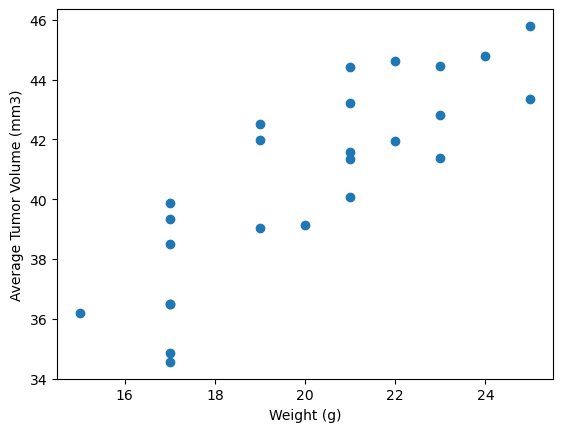

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

## Get all the mice on Capomulin
capomulin_df = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == "Capomulin"]

## Extract only data on Mouse ID, Weight, and Tumor Volume from the section of dataframe with information on mice on Capomulin
capomulin_weight_tumor_df = capomulin_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

## Group capomulin data by Mouse ID
capomulin_groupby = capomulin_weight_tumor_df.groupby(["Mouse ID"], as_index = True)

## Find mean weights and tumor volumes of mice on Capomulin
## Since I am assuming the weight of each mouse stays the same throughout the course of treatment, I assume the 
## mean weight of each mouse is its weight
capomulin_means = capomulin_groupby.mean()


## Scatterplot
plt.scatter(capomulin_means["Weight (g)"], capomulin_means["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

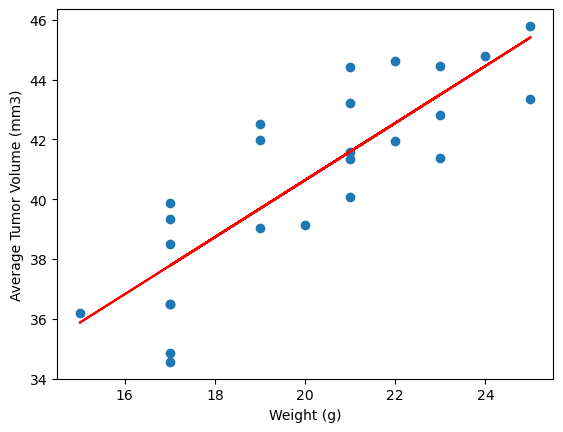

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

## Correlation coefficient
corr = st.pearsonr(capomulin_means["Weight (g)"], capomulin_means["Tumor Volume (mm3)"])

## Linear Regression Model
regression_model  = st.linregress(capomulin_means["Weight (g)"], capomulin_means["Tumor Volume (mm3)"])
slope = regression_model.slope
intercept = regression_model.intercept
fitted_y_values = slope * capomulin_means["Weight (g)"] + intercept
plt.scatter(capomulin_means["Weight (g)"], capomulin_means["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(capomulin_means["Weight (g)"], fitted_y_values, color="red")
plt.show()